In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from constants import LABELS_PATH_FULL, LABELS_PATH_CROPPED

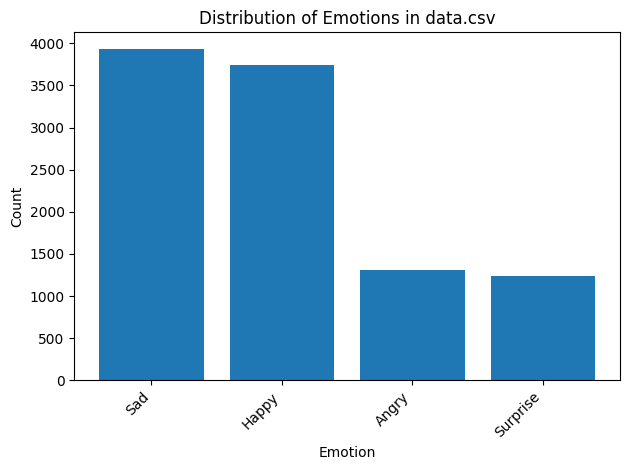


TOTAL IMAGES: 10221
label
Sad         3934
Happy       3740
Angry       1313
Surprise    1234
Name: count, dtype: int64


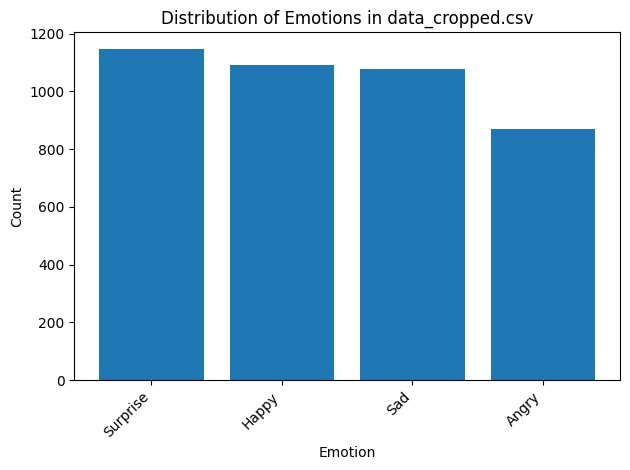


TOTAL IMAGES: 4183
label
Surprise    1147
Happy       1090
Sad         1076
Angry        870
Name: count, dtype: int64


In [2]:
def show_class_distribution(labels_csv_path: str):
    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(labels_csv_path)

    # Count the occurrences of each emotion
    emotion_counts_df = df['label'].value_counts()

    # Create a bar chart
    plt.bar(x = emotion_counts_df.index, height = emotion_counts_df)
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title(f'Distribution of Emotions in {os.path.basename(labels_csv_path)}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

    return emotion_counts_df

# Call the function to show the class distribution
emotion_counts = show_class_distribution(LABELS_PATH_FULL)
print("\nTOTAL IMAGES:", sum(emotion_counts))
print(emotion_counts)

emotion_counts_cropped = show_class_distribution(LABELS_PATH_CROPPED)
print("\nTOTAL IMAGES:", sum(emotion_counts_cropped))
print(emotion_counts_cropped)


max_width = 4414
max_height = 4414
median_width = 285.0
median_height = 334.0


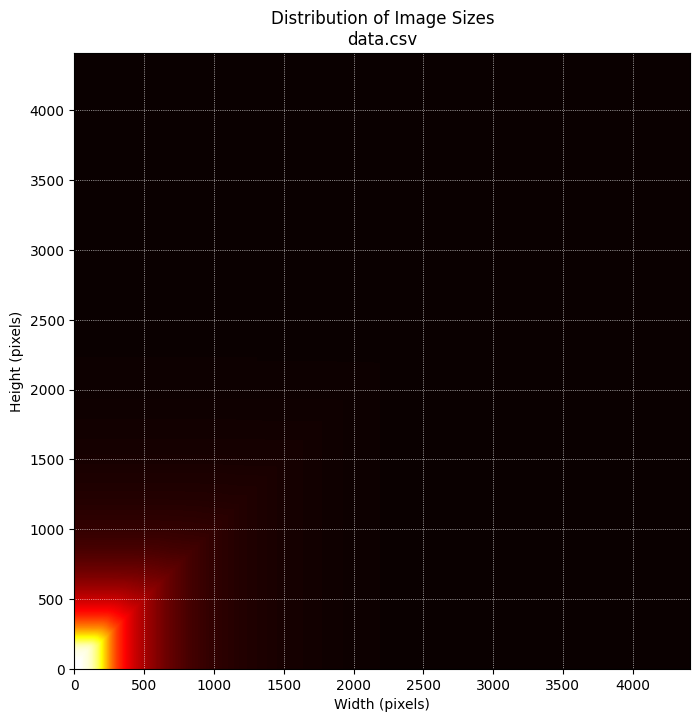

max_width = 2376
max_height = 3637
median_width = 212.0
median_height = 294.0


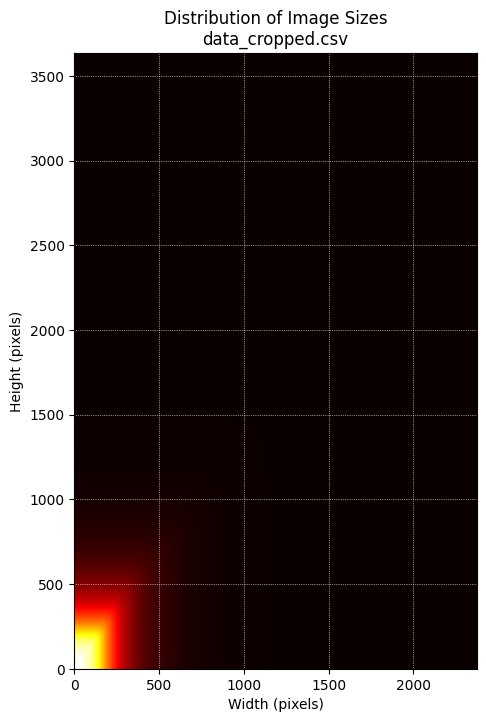

In [3]:
# prompt: # prompt: write a function that shows the distribution of image sizes. it should look  like a heat map where the chart dimensions represent the height and width of each image, and each pixel in the heat map represents the frequency of images that have a pixel in that position. reference the image dimensions in columns "width" and height of the input csv file.

import numpy as np
import matplotlib.pyplot as plt

def show_image_size_distribution(labels_csv_path):
    """ Show a heatmap of the distribution of image sizes in the dataset.
    
    Params:
        labels_csv_path (str): The path to a CSV file containing image labels.
    """
    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(labels_csv_path)

    # Get a list of the width and height of every image in folder_path
    widths = np.array(df['width'].values)
    heights = np.array(df['height'].values)

    # Get and show some some image size statistics
    max_width = max(widths)
    max_height = max(heights)
    median_width = np.median(widths)
    median_height = np.median(heights)

    print(f"{max_width = }")
    print(f"{max_height = }")
    print(f"{median_width = }")
    print(f"{median_height = }")

    # Create a 2D array to store the heatmap data
    heatmap_data = np.zeros((max_height, max_width))

    # populate the heatmap_data
    for w, h in zip(widths, heights):
        heatmap_data[0:h, 0:w] += 1

    # Standardize to show the % of images with dimensions at least that large
    heatmap_data = heatmap_data / float(len(widths))

    # Create a 2D histogram (heatmap) of image dimensions
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap_data, cmap='hot', origin='lower')
    plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, color='white')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.title(f'Distribution of Image Sizes\n{os.path.basename(labels_csv_path)}')
    plt.show()

    return None


# Call the function to show the image size distribution
show_image_size_distribution(LABELS_PATH_FULL)

# show the image size distribution for the cropped images
show_image_size_distribution(LABELS_PATH_CROPPED)

Largest Image:
  Path: data/dataset/0b33a4dcf06b8a2480d761fe124f2d2b931ad9625b173c053c1a27bb.jpg
  Emotion: Sad
  Width: 4414
  Height: 4414


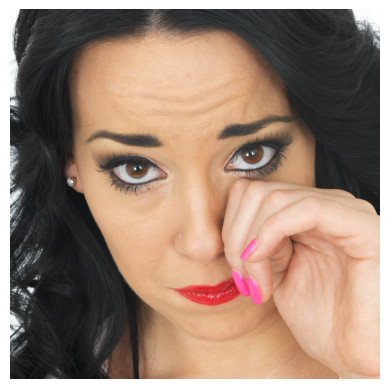


Smallest Image:
  Path: data/dataset/cropped_emotions.505782.png
  Emotion: Happy
  Width: 8
  Height: 12


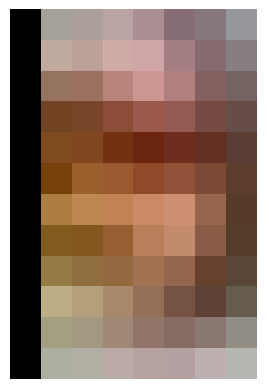

In [4]:

def find_extreme_images(labels_csv_path, criteria='width', extreme='both'):
    """ Finds and displays the images with the most extreme dimensions (largest and/or smallest)
    based on the specified criteria (width or height).

    Args:
        labels_csv_path (str): Path to the CSV file containing image labels.
        criteria (str, optional): Criteria for finding extreme images. Either 'width' or 'height'.
                                    Defaults to 'width'.
        extreme (str, optional): Which extreme to find. Either 'largest', 'smallest', or 'both'.
                                Defaults to 'both'.
    """
    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(labels_csv_path)

    # Find the images with the largest and smallest dimensions
    if extreme == 'largest' or extreme == 'both':
        largest_image_row = df.loc[df[criteria].idxmax()]
        largest_image_path = os.path.join("data", "dataset", str(largest_image_row['path']))

    if extreme == 'smallest' or extreme == 'both':
        smallest_image_row = df.loc[df[criteria].idxmin()]
        smallest_image_path = os.path.join('data', 'dataset', str(smallest_image_row['path']))

    # Display the images
    if extreme == 'largest' or extreme == 'both':
        print("Largest Image:")
        print(f"  Path: {largest_image_path}")
        print(f"  Emotion: {largest_image_row['label']}")
        print(f"  Width: {largest_image_row['width']}")
        print(f"  Height: {largest_image_row['height']}")
        img = mpimg.imread(largest_image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    if extreme == 'smallest' or extreme == 'both':
        print("\nSmallest Image:")
        print(f"  Path: {smallest_image_path}")
        print(f"  Emotion: {smallest_image_row['label']}")
        print(f"  Width: {smallest_image_row['width']}")
        print(f"  Height: {smallest_image_row['height']}")
        img = mpimg.imread(smallest_image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Call the function to find and display the extreme images
find_extreme_images('data/data.csv', criteria='width', extreme='both')


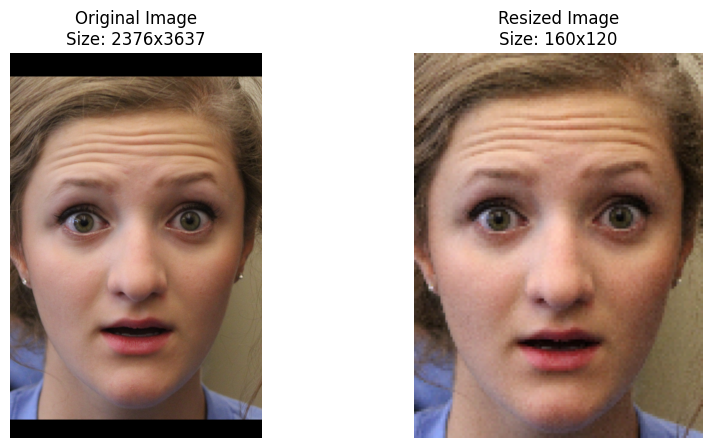

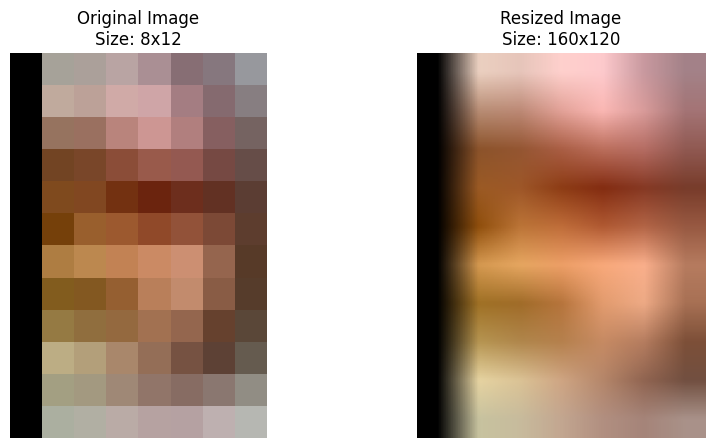

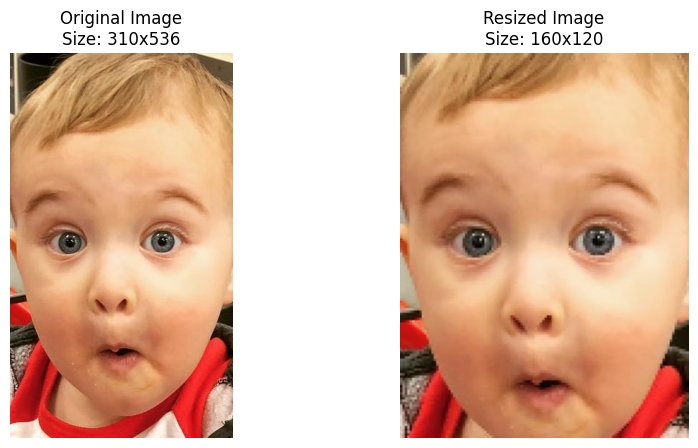

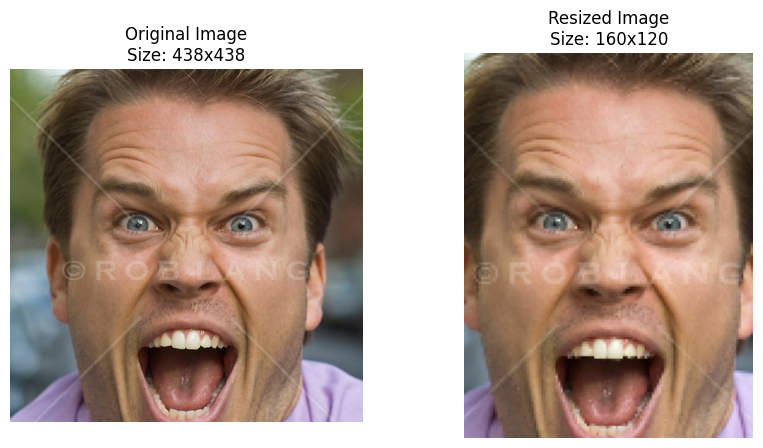

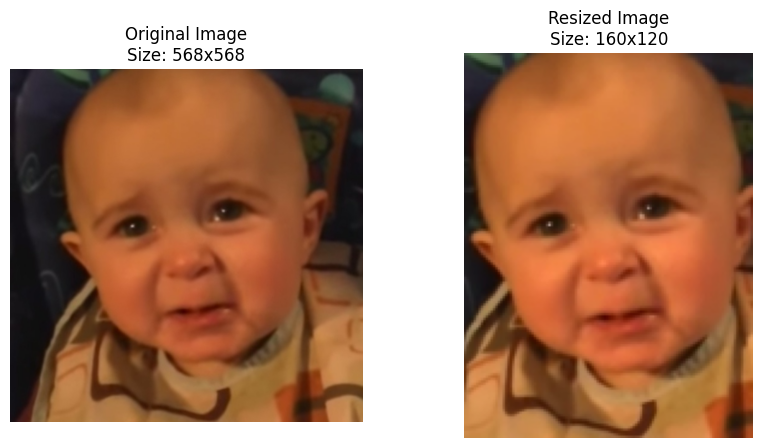

In [5]:
import keras

def example_image_crop_and_resize(image_path, target_size = (160, 120)):
    """ Load an image, crop it to the same aspect ratio as target_size, resize it to the 
        target_size, and display the original and processed images. 
    """
    
    # Load the image with keras
    image_original = keras.preprocessing.image.load_img(image_path)
    image_array = keras.preprocessing.image.img_to_array(image_original)

    # Calculate cropping dimensions so that it is in a 3:2 h:w ratio
    h1, w1 = image_array.shape[0], image_array.shape[1]
    target_aspect = target_size[0] / target_size[1]
    aspect = h1 / w1

    # if aspect > target_aspect, then the image is too tall and we should do a center crop where the width stays the same but the pixels from top and bottom until image fits the correct ratio
    # h and w are the new rezides height and width values
    if aspect > target_aspect:
        h = int(w1 * target_aspect)
        w = w1
    else:
        h = h1
        w = int(h1 / target_aspect)

    # crop the image
    h_cut = (h1 - h) // 2
    w_cut = (w1 - w) // 2
    image_array = image_array[h_cut:h_cut+h, w_cut:w_cut+w, :]

    # Resize the cropped image
    resized_image_array = keras.preprocessing.image.smart_resize(image_array, target_size)


    # Display the original image
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_original)
    axes[0].set_title(f"Original Image\nSize: {w1}x{h1}")
    axes[0].axis('off')

    # Convert the resized image array back to a PIL Image, then show it
    resized_image = keras.preprocessing.image.array_to_img(resized_image_array)
    # Display the processed image
    axes[1].imshow(resized_image)
    axes[1].set_title(f"Resized Image\nSize: {target_size[0]}x{target_size[1]}")
    axes[1].axis('off')
    plt.show()

    return None


# show some example usage of this
example_image_crop_and_resize('data/dataset/cropped_emotions.99996~12fffff.png')
example_image_crop_and_resize('data/dataset/cropped_emotions.505782.png')
example_image_crop_and_resize('data/dataset/cropped_emotions.263517~12fffff.png')
example_image_crop_and_resize('data/dataset/5bd3d5e819c3d60b00add2eff30d3b708939b656d5afd6e2706688f6~angry.jpg')
example_image_crop_and_resize('data/dataset/1db6bf901183de7c0b86410635bfb0a197f3523a2152c6441b727b96.jpg')